# Forecasting the price of apartments in Tehran using LLS algorithm


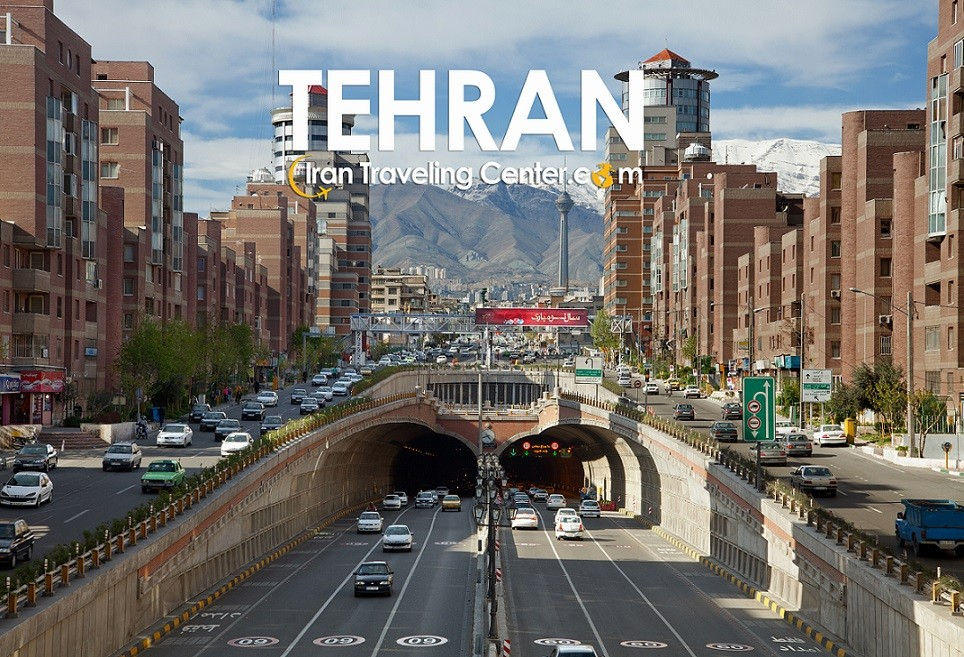

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lls import LinearLeastSquare


In [2]:
data = pd.read_csv("HousePrice.csv")
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [3]:
# Preprocessing

data['Parking'].replace([True ,False],[1,0], inplace=True)
data['Warehouse'].replace([True , False] , [1,0] , inplace=True)
data['Elevator'].replace([True , False] ,[1,0] , inplace = True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
data.drop("Address", axis=1 , inplace=True)

In [5]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000
Price(USD),0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   int64  
 1   Room        3473 non-null   int64  
 2   Parking     3473 non-null   int64  
 3   Warehouse   3473 non-null   int64  
 4   Elevator    3473 non-null   int64  
 5   Price       3473 non-null   float64
 6   Price(USD)  3473 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 190.1 KB


In [7]:
data[data.duplicated()]

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
55,61,1,1,1,0,2.030000e+09,67666.67
78,74,2,1,1,1,1.700000e+09,56666.67
79,88,3,0,0,1,5.600000e+08,18666.67
80,63,1,1,1,1,2.150000e+09,71666.67
81,114,3,1,1,1,5.500000e+09,183333.33
...,...,...,...,...,...,...,...
3453,80,2,1,1,1,2.250000e+09,75000.00
3455,55,1,1,1,1,2.300000e+09,76666.67
3456,60,1,1,1,1,1.950000e+09,65000.00
3470,75,2,0,0,0,3.650000e+08,12166.67


In [8]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)


Text(0.5, 1.0, 'Correlation between the columns of Tehran apartment price dataset')

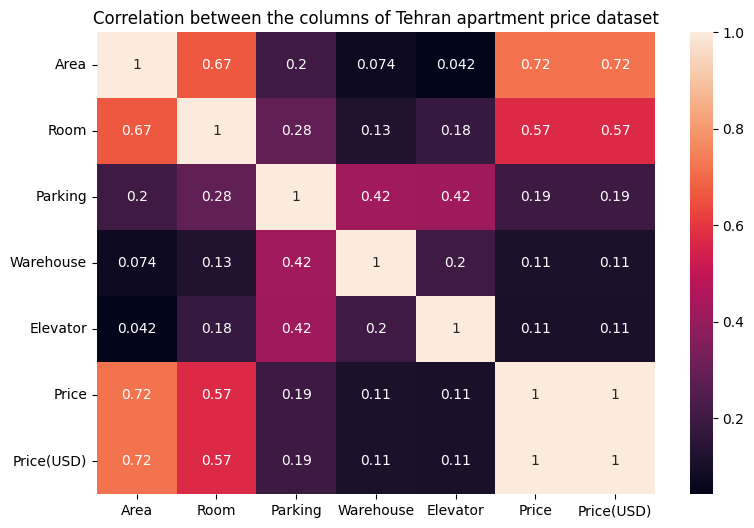

In [9]:
corr =data.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr , annot=True)
plt.title("Correlation between the columns of Tehran apartment price dataset")

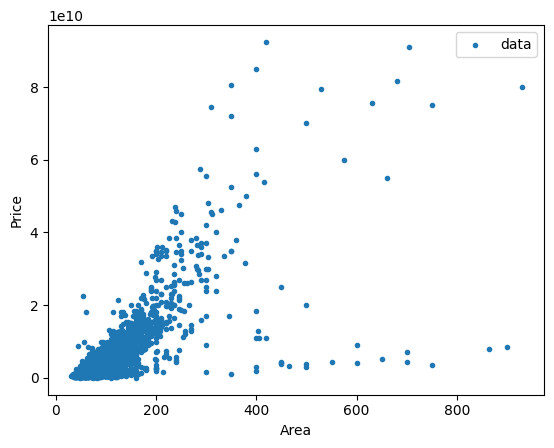

In [10]:

plt.scatter(data['Area'] ,data['Price'] , marker='.')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(['data'])
plt.show()

In [11]:
X = np.array(data[["Area"]])
Y = np.array(data[["Price"]])

print(X.shape)
print(Y.shape)

(3055, 1)
(3055, 1)


In [12]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X ,Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2291, 1)
(2291, 1)
(764, 1)
(764, 1)


In [13]:
lls = LinearLeastSquare()
lls.fit(X_train,Y_train)
Y_pred = lls.predict(X_test)

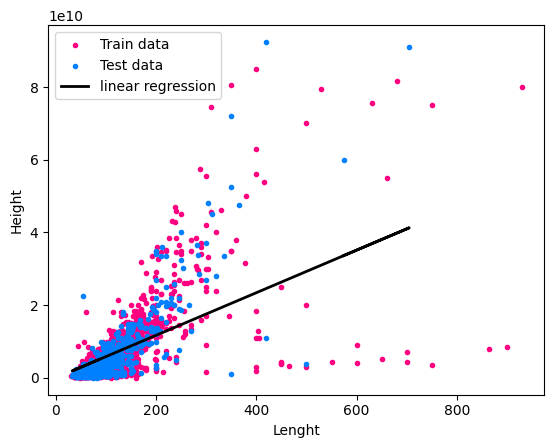

In [14]:
plt.scatter(X_train , Y_train , marker='.' , c='#ff0080')
plt.scatter(X_test , Y_test , marker ='.' , c='#0080ff')
plt.plot(X_test , Y_pred , color = 'black' , lw =2)
plt.xlabel("Lenght")
plt.ylabel("Height")
plt.legend(["Train data" , "Test data" , "linear regression"])
plt.show()

In [15]:
lls.evaluate(X_test ,Y_test,"mae")

3434009369.536854

# benefits of lls
### Easy implementation
### High speed of training
### Very high speed of prediction
### There is no need for training data at the time of prediction
### No need to set hyperparameter
### KNN algorithm, its fit function was executed quickly, but its predict function took a long time due to the for loop.

# Disadvantages of lls
### It is only useful for linear problems
### It is only useful for regression problems
### The matrix may not be invertible
### In the most time and running the fit function, it wants all the data at once so that I can do the matrix multiplication operation for all the data at once.
### We may not have all the data at the moment of training and the data will be given little by little
### We must have an algorithm in this case that will be the least
### It needs all training data at once and cannot do it individually
## KNN algorithm is only useful for calcification problems
## The LLS algorithm is only useful for regression problems